In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [2]:
# Generate synthetic data with multi-collinearity
X, y = make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42
)

In [3]:
# Create a collinear feature (a linear combination of the original features)
X_collinear = X.copy()
X_collinear[:, 1] = 2 * X[:, 0]  # Feature 2 is a multiple of Feature 1


In [4]:
# Fit a logistic regression model to the original data
logreg_original = LogisticRegression(solver='liblinear')
logreg_original.fit(X, y)

LogisticRegression(solver='liblinear')

In [5]:
# Fit a logistic regression model to the data with multi-collinearity
logreg_collinear = LogisticRegression(solver='liblinear')
logreg_collinear.fit(X_collinear, y)

LogisticRegression(solver='liblinear')

In [6]:
# Display coefficients of both models
print("Logistic Regression Coefficients (Original Data):")
print(logreg_original.coef_)

print("\nLogistic Regression Coefficients (Data with Multi-collinearity):")
print(logreg_collinear.coef_)

Logistic Regression Coefficients (Original Data):
[[ 3.23176556 -0.84517885]]

Logistic Regression Coefficients (Data with Multi-collinearity):
[[0.81549245 1.6309849 ]]


In [7]:
# Plot decision boundaries for both models
def plot_decision_boundary(model, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

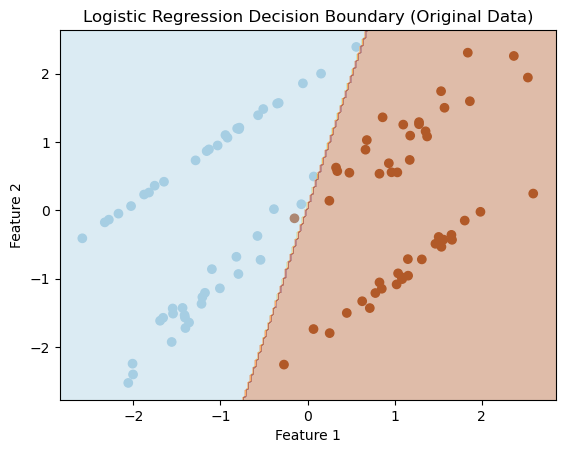

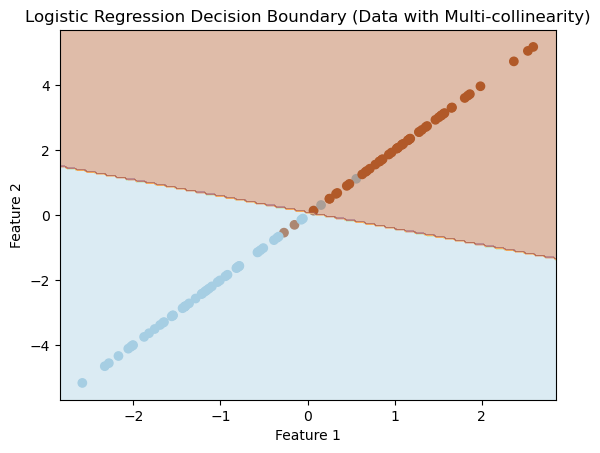

In [8]:
plot_decision_boundary(logreg_original, X, y, 'Logistic Regression Decision Boundary (Original Data)')
plot_decision_boundary(logreg_collinear, X_collinear, y, 'Logistic Regression Decision Boundary (Data with Multi-collinearity)')

- generate synthetic data with two features where one feature is a linear combination of the other, introducing multi-collinearity.

- fit logistic regression models to both the original data and the data with multi-collinearity.

- plot decision boundaries for both models to visualize the impact on the classification.

- notice that the logistic regression model trained on the data with multi-collinearity has less stable and interpretable coefficients, and the decision boundary is affected, making it less clear and potentially leading to less reliable predictions. 

- Multi-collinearity can complicate the interpretation of logistic regression models and reduce their predictive power.